<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/analisando_cenario_covid-19/blob/main/cenario_covid_no_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 alingn="center"> Cenário do COVID-19 no Brasil <h1>

Data Science Jr.: Karina Gonçalves Soares

Link de estudo:

* [Panorama do COVID-19 no Brasil](https://www.kaggle.com/code/elloaguedes/panorama-do-covid-19-no-brasil)

* [Dataset](https://www.kaggle.com/datasets/unanimad/corona-virus-brazil?select=brazil_covid19.csv)

Nosso objetivo é analisar os dados disponíveis na base de dados brasileira sobre o COVID-19. **As informações gerais aqui não fornecem garantia.**

 **Este projeto foi descontinuado em 08/06/2020**

In [ ]:
# imports
import numpy as np
import pandas as pd
import os
import numpy as np

# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
from bokeh.models import GeoJSONDataSource
output_notebook()

# plotly packages
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

import json
import geopandas as gpd
import plotly.graph_objects as go
import unidecode

In [ ]:
# Chamando os dados

data = pd.read_csv("/content/drive/MyDrive/cruzeiro_do_sul/brazil_covid19.csv")

data.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0


In [ ]:
# Exibindo as últimas linhas do DataFrame
data.tail()

,date,region,state,cases,deaths
12253,2021-05-23,Sudeste,RJ,840480.0,49515
12254,2021-05-23,Sudeste,SP,3188105.0,107614
12255,2021-05-23,Sul,PR,1060683.0,25506
12256,2021-05-23,Sul,RS,1059990.0,27419
12257,2021-05-23,Sul,SC,947810.0,14822


In [ ]:
# Linhas Vs Colunas
data.shape

(12258, 5)

* A qual período de tempo os dados se referem?

In [ ]:
# Printando as datas do início e do fim das análises

print(min(data['date']))
print(max(data['date']))

2020-02-25
2021-05-23


* Qual a ocorrência diária de casos suspeitos, confirmados e mortes no período?

In [ ]:
# Criando um novo DataFrame "df2"
# Agrupamento dos dados com base nas colunas "date", "cases" e "deaths"

df2 = data.groupby(['date'])[['cases', 'deaths']].agg('sum') #.agg('sum'), faz a gregação da colunas usando a função sum

df2.head(2)

,cases,deaths
date,,
2020-02-25,0.0,0
2020-02-26,1.0,0


In [ ]:
# Mudando o type da coluna cases para int.
df2['cases'] = df2['cases'].astype(int)

In [ ]:
df2.head()

,cases,deaths
date,,
2020-02-25,0,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,0


Resposta: Os gráficos a seguir mostram as ocorrências diárias para casos suspeitos, confirmados e óbitos. Note que a escala de cada gráfico é diferente, mas que a ordem de crescimento em todos segue de maneira ascendente.

In [23]:
### Atualizando com antiga versão do dataset

old = pd.read_csv('/content/drive/MyDrive/cruzeiro_do_sul/brazil_covid19_old.csv')
old = old.groupby(['date'])['suspects'].agg('sum') # Agrupamento

layout = Layout(
    paper_bgcolor='rgba(255,255,255,0.5)', #configurando cor de fundo
    plot_bgcolor='rgba(0,0,0,0)', #configurando a cor do gráfico
    xaxis = dict(
        # Personalizando eixo x para exibir rótulos usando valores do índice do df
        tickmode = 'array',
        tickvals = old.index,
        ticktext = old.index
    ),
    xaxis_title="Data",
    yaxis_title = "Quantidade"
)
suspeitos = old.loc[:'2020-03-21'] # Pegando os dados do df old até "2020-03-21"
fig = px.bar(title='Casos suspeitos -- Descontinuado a partir de 21/03/2020', x=suspeitos.index, y=suspeitos) #criando gráfico de barras
fig['layout'].update(layout) #aplica o layout personalizado definido anteriormente
fig.show()

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

fig = make_subplots(rows=2, cols=1,subplot_titles=('Casos Confirmados até ' + today, 'Óbitos até '+ today))
fig.append_trace(go.Bar(name='Confirmados', x=df2.index, y=df2['cases']), row=1, col=1)
fig.append_trace(go.Bar(name='Óbitos', x=df2.index, y=df2['deaths']), row=2, col=1)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Quantidade", row=1, col=1)
fig.update_xaxes(title_text="Data", row=2, col=1)
fig.update_yaxes(title_text="Quantidade", row=2, col=1)

fig['layout'].update(layout)

fig.show()

<ipython-input-25-daca75f9dd66>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



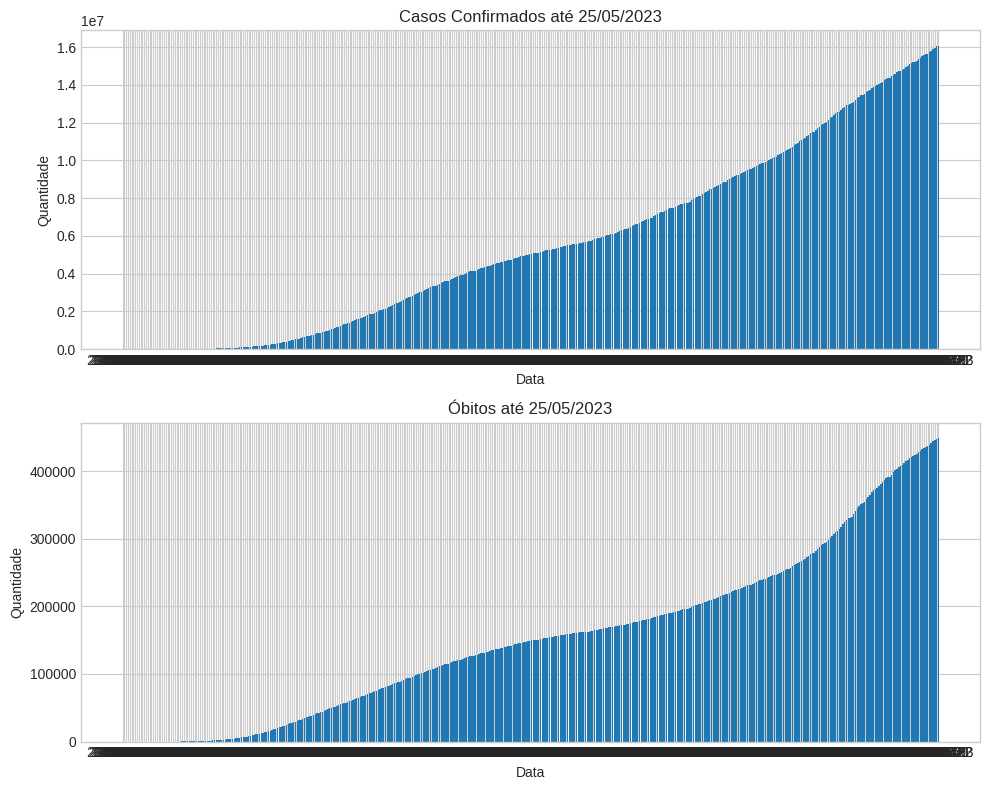

In [25]:
import matplotlib.pyplot as plt

# Configuração do layout
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-whitegrid')

# Primeiro subplot: Casos Confirmados
plt.subplot(2, 1, 1)
plt.bar(df2.index, df2['cases'])
plt.title('Casos Confirmados até ' + today)
plt.xlabel('Data')
plt.ylabel('Quantidade')

# Segundo subplot: Óbitos
plt.subplot(2, 1, 2)
plt.bar(df2.index, df2['deaths'])
plt.title('Óbitos até ' + today)
plt.xlabel('Data')
plt.ylabel('Quantidade')

# Ajuste de espaçamento entre subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()